In [345]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import metrics


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/glass/glass.csv


In [346]:
dataset = pd.read_csv('../input/glass/glass.csv')#constructing a dataframe
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [347]:
X = dataset.iloc[:, :-1].values #feature matrix
y = dataset.iloc[:, 9].values #label vector
K=1 #number of neighbors

In [348]:
from sklearn.preprocessing import StandardScaler
#normalizing the features
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=4)



In [349]:
#defining the classifier
classifier = KNeighborsClassifier(n_neighbors = K).fit(X_train,y_train)
y_pred = classifier.predict(X_test)
#confusion matrix
print(confusion_matrix(y_test, y_pred))




[[10  1  0  0  0]
 [ 3  8  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.89      0.73      0.80        11
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.88        33
   macro avg       0.93      0.93      0.93        33
weighted avg       0.89      0.88      0.88        33



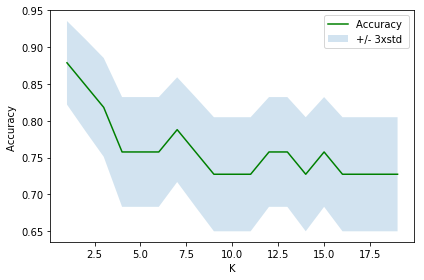

In [350]:
#printing the f-1 score, precision, recall and accuracies
print(classification_report(y_test, y_pred, target_names=None))

#training the model with different K values and making predictions
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):      
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K')
plt.tight_layout()
plt.show()

In [351]:
print( "The best accuracy,", mean_acc.max(), ", was achieved with k=", mean_acc.argmax()+1) 

The best accuracy, 0.8787878787878788 , was achieved with k= 1
